## Let's code along
### Import libraries and functions

In [1]:
from __future__ import print_function

from time import time
import keras
from keras.datasets import mnist,cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras import backend as K

import matplotlib.pyplot as plt
import random

### Filters, pool size, and kernel size

In [2]:
# number of convolutional filters to use
filters = 64
# size of pooling area for max pooling
pool_size = 2
# convolution kernel size
kernel_size = 3

### Load and split the data between train and test sets

In [3]:
(x_cifar_train, y_cifar_train), (x_cifar_test, y_cifar_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
y_cifar_train = y_cifar_train.reshape(50000,)
y_cifar_test = y_cifar_test.reshape(10000,)

### Create two datasets one with class labels below 5 and one with 5 and above

In [5]:
x_train_lt5 = x_cifar_train[y_cifar_train < 5]
y_train_lt5 = y_cifar_train[y_cifar_train < 5]
x_test_lt5 = x_cifar_test[y_cifar_test < 5]
y_test_lt5 = y_cifar_test[y_cifar_test < 5]

x_train_gte5 = x_cifar_train[y_cifar_train >= 5]
y_train_gte5 = y_cifar_train[y_cifar_train >= 5] - 5
x_test_gte5 = x_cifar_test[y_cifar_test >= 5]
y_test_gte5 = y_cifar_test[y_cifar_test >= 5] - 5

### Let's see some examples from the two data sets to understand what's going on.

Here is the description of the categories in the CIFAR-10 dataset,

![cifar-10](https://raw.githubusercontent.com/tirthajyoti/Deep-learning-with-Python/master/images/CIFAR-10-categories.PNG)

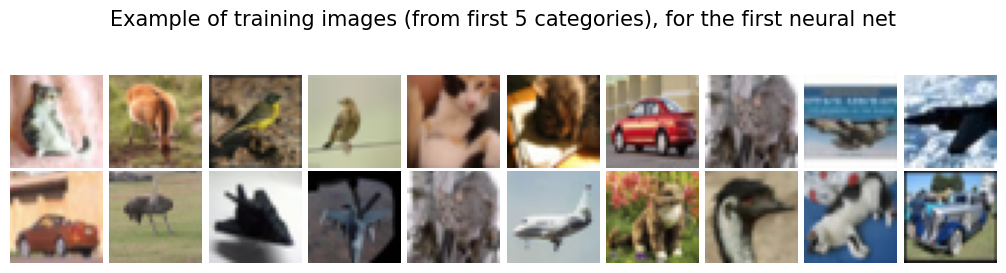

In [6]:
fig, ax = plt.subplots(2,10,figsize=(10,2.8))
fig.suptitle("Example of training images (from first 5 categories), for the first neural net\n", fontsize=15)
axes = ax.ravel()
for i in range(20):
    # Pick a random number
    idx=random.randint(1,1000)
    axes[i].imshow(x_train_lt5[idx])
    axes[i].axis('off')
fig.tight_layout(pad=0.5)
plt.show()

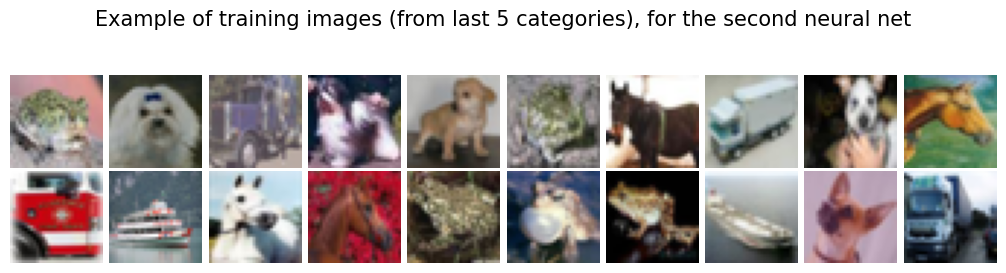

In [7]:
fig, ax = plt.subplots(2,10,figsize=(10,2.8))
fig.suptitle("Example of training images (from last 5 categories), for the second neural net\n", fontsize=15)
axes = ax.ravel()
for i in range(20):
    # Pick a random number
    idx=random.randint(1,1000)
    axes[i].imshow(x_train_gte5[idx])
    axes[i].axis('off')
fig.tight_layout(pad=0.5)
plt.show()

### Set the number of classes and the input shape

In [8]:
num_classes = 5
input_shape = (32,32,3)

### Define two groups of layers: feature (convolutions) and classification (dense)

In [9]:
feature_layers = [
    Conv2D(filters, kernel_size,
           padding='valid',
           input_shape=input_shape),
    Activation('relu'),
    Conv2D(filters, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=pool_size),
    Dropout(0.25),
    Flatten(),
]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.25),
    Dense(num_classes),
    Activation('softmax')
]

### Create the complete model by stacking together `feature_layers` and `classification_layers`

In [11]:
model_1 = Sequential(feature_layers + classification_layers)

### Function definition for training a model

In [25]:
def train_model(model, train, test, num_classes):
    x_train = train[0].reshape((train[0].shape[0],) + input_shape)
    x_test = test[0].reshape((test[0].shape[0],) + input_shape)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(train[1], num_classes)
    y_test = keras.utils.to_categorical(test[1], num_classes)

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

    t1 = time()
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
    t2 = time()
    t_delta = round(t2-t1,2)
    print('Training time: {} seconds'.format(t_delta))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

### Batch size and epochs

In [26]:
batch_size = 128
epochs = 20

### Train model for the first 5 categories of images

In [27]:
train_model(model_1,
            (x_train_lt5, y_train_lt5),
            (x_test_lt5, y_test_lt5), num_classes)

x_train shape: (25000, 32, 32, 3)
25000 train samples
5000 test samples
Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9307 - loss: 0.1887 - val_accuracy: 0.7806 - val_loss: 0.8159
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9359 - loss: 0.1713 - val_accuracy: 0.7870 - val_loss: 0.8498
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9357 - loss: 0.1692 - val_accuracy: 0.7794 - val_loss: 0.8789
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9449 - loss: 0.1524 - val_accuracy: 0.7612 - val_loss: 0.9307
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9425 - loss: 0.1528 - val_accuracy: 0.7850 - val_loss: 0.8822
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9443 - loss: 0.1539 - val_accuracy: 0.7770 - val_loss: 0.8964
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9475 - loss: 0.1434 - val_accuracy: 0.7764 - val_loss: 0.9357
Epoch 8/20
196/196 ━━━━━━

### Show the model summary and note that there are no untrainable parameters

In [28]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 5)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,935,377 (18.83 MB)

 Trainable params: 1,645,125 (6.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,290,252 (12.55 MB)

### Freeze feature layers and rebuild model
This freezing of feature layers is at the heart of transfer learning. This allows re-use of pre-trained model for classification tasks, because users can just stack up new fully-connected layers on top of the pre-trained feature layers and get good performance.

We will create a fresh new model called `model_2` with the untrainable `feature_layers` and trainable `classification_layers`

In [29]:
for l in feature_layers:
    l.trainable = False

In [30]:
model_2 = Sequential(feature_layers + classification_layers)

### Show the model summary and see that the features layers (Conv2D) have been renderd untrainable now

In [31]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 5)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,645,125 (6.28 MB)

 Trainable params: 1,606,405 (6.13 MB)

 Non-trainable params: 38,720 (151.25 KB)

### Now train the model and see how it takes less overall time and still gets equal or higher performance (validation accuracy)

In [32]:
# transfer: train dense layers for new classification task
train_model(model_2,
            (x_train_gte5, y_train_gte5),
            (x_test_gte5, y_test_gte5), num_classes)

x_train shape: (25000, 32, 32, 3)
25000 train samples
5000 test samples
Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.3145 - loss: 3.6332 - val_accuracy: 0.6668 - val_loss: 0.8837
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6302 - loss: 0.9306 - val_accuracy: 0.7522 - val_loss: 0.6770
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7208 - loss: 0.7353 - val_accuracy: 0.7916 - val_loss: 0.5968
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7677 - loss: 0.6311 - val_accuracy: 0.8064 - val_loss: 0.5472
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7878 - loss: 0.5605 - val_accuracy: 0.8176 - val_loss: 0.5141
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8115 - loss: 0.4964 - val_accuracy: 0.8234 - val_loss: 0.5005
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8296 - loss: 0.4537 - val_accuracy: 0.8286 - val_loss: 0.4879
Epoch 8/20
196/196 ━━━━━━━━━━━━

### Plot the accuracy

### Time taken by the two models for training (identical number of epochs)

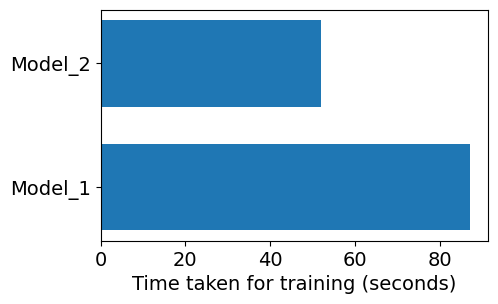

In [33]:
plt.figure(figsize=(5,3))
plt.barh(y=['Model_1','Model_2'],width=[87,52],height=0.7)
plt.xlabel("Time taken for training (seconds)",fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

## Summary
The `model_2` was initialized a fresh model consisting of untrainable Conv2D layers and trainable fully-connected layers. The Conv2D layers' weights were transferred from a previously trained `model_1`.

Not only, did the `model_2` train faster than `model_1`, it also started at a higher baseline accuracy and achieved better final accuracy for the same number of epochs and identical hyperparameters (learning rate, optimizer, batch size, etc.).

And it achieved this training on images which were not seen by `model_1`. **This is the essence of transfer learning.**

This means that although `model_1` was trained on images of - **airplane, automobile, bird, cat, or deer** - it’s learned weights, when transferred to `model_2`, helped `model_2` achieve excellent performance on the classification of completely different categories of images - **dog, frog, horse, sheep, or truck**.

![two-categories](https://raw.githubusercontent.com/tirthajyoti/Deep-learning-with-Python/master/images/transfer-learning-2-categories.png)

.
